# CERN Voltage scan

## Imports

In [1]:
from numpy import *
 
import convert
from plotting.draw import *  # noqa
import src.bins as bins  # noqa
from src.dut_analysis import DUTAnalysis, Analysis
from src.batch_analysis import BatchAnalysis
from src.run import load_nrs
from src.scan import Ensemble, Scan, VScan, TScan
from utility.utils import *  # noqa
from functools import partial

Welcome to JupyROOT 6.26/10


In [2]:
# run = 485
# verbose=0
# test=0
# testcampaign='201810'
# batch='1f'
# dut=0
# do_convert=0
# remove_meta=0
# runplan=None
# scan = 'v-b6'

## Initialize an instance of the analysis class

In [3]:
# if runplan is not None:
#     from src.spreadsheet import make
#     make(runplan)
#     exit(2)

# ensembles = load_json(Ensemble.FilePath)

# print(ensembles)

# if scan in ensembles:
#     s = VScan if 'v-' in scan else TScan if 't-' in scan else Scan
#     z = s(scan, verbose, test)

# else:
#     ana = Analysis(testcampaign)
#     runs = load_nrs(ana.BeamTest.Path)
#     is_batch = not (run in runs and batch is None)
#     dut_ana = partial(BatchAnalysis, choose(batch, run)) if is_batch else partial(DUTAnalysis, run)
#     dut_ana = partial(dut_ana, dut, testcampaign)

#     if is_batch:
#         bc = convert.BatchConvert(dut_ana.args[0], dut_ana.args[-1], verbose=False, force=False)
#         if do_convert:
#             remove_file(bc.Batch.FileName)
#             bc.remove_aux_files()
#         if not bc.Batch.FileName.exists() and not test:
#             bc.run()

#     if remove_meta:
#         z = dut_ana(verbose=False, test=True)
#         z.remove_metadata()

#     if do_convert and not is_batch:
#         z = dut_ana(verbose=False, test=True)
#         z.remove_file()
#         z.Converter.remove_aux_files()

#     z = dut_ana(verbose=verbose, test=test)

{'v-b6': {'dut': 'II6-B6', '201810': ['1f', '1b', '1c', '1d', '1e']}, 'v-a2': {'dut': 'II6-A2', '201810': ['2a', '2b', '2c', '2d', '2e']}, 'test': {'dut': 'II6-B6', '201810': ['23d']}, 't-b6': {'dut': 'II6-B6', '201912': [17, 24, 25, 26]}, 'v-b6d': {'dut': 'II6-B6', '201912': [4, 7, 8, 10, 12, 17]}}

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
STARTING BATCH ANALYSIS of II6-B6, batch 1f (Oct 2018), 5.27M ev |
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
STARTING BATCH ANALYSIS of II6-B6, batch 1b (Oct 2018), 8.23M ev |
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
STARTING BATCH ANALYSIS of II6-B6, batch 1c (Oct 2018), 6.05M ev |
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
STARTING BATCH ANALYSI

Useful function to draw the last canvas inline

In [4]:
def dc(): get_last_canvas().Draw()

## Initialize an instance of the CERN Voltage scan `v-b6`

In [21]:
cern = VScan('v-b6')


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
STARTING DUT ANALYSIS of II6-B6, run 4 (Dec 2019), 2.50M ev |
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
STARTING DUT ANALYSIS of II6-B6, run 7 (Dec 2019), 6.20M ev |
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
STARTING DUT ANALYSIS of II6-B6, run 8 (Dec 2019), 2.70M ev |
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
STARTING DUT ANALYSIS of II6-B6, run 10 (Dec 2019), 2.50M ev |
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
STARTING DUT ANALYSIS of II6-B6, run 12 (Dec 2019), 2.50M ev |
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## Initialize an instance of the DESY Voltage scan

In [21]:
desy = VScan('v-b6d')


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
STARTING DUT ANALYSIS of II6-B6, run 4 (Dec 2019), 2.50M ev |
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
STARTING DUT ANALYSIS of II6-B6, run 7 (Dec 2019), 6.20M ev |
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
STARTING DUT ANALYSIS of II6-B6, run 8 (Dec 2019), 2.70M ev |
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
STARTING DUT ANALYSIS of II6-B6, run 10 (Dec 2019), 2.50M ev |
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
STARTING DUT ANALYSIS of II6-B6, run 12 (Dec 2019), 2.50M ev |
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [5]:
cern?

Type:            VScan
String form:     v-b6
File:            ~/software/HighResAnalysis/src/scan.py
Docstring:       <no docstring>
Class docstring: Base class defining actions on several runs or batches


In [42]:
def suf(z:VScan):
    # makes a suffix to add to file names
    return f'{z.DUT.Name}-{z.__class__.__name__}-{z.Anas[0].BeamTest.Location}'.lower().replace('ii6-', '')
suf(desy)

'b6-vscan-desy'

## Currents versus the bias voltage

INFO:     11:11:11 --> saving plot: cur-b6-vscan-desy

INFO:     11:11:11 --> wrote file /home/dmitry/mounts/high-rate/content/duts/II6-B6/v-b6d/cur-b6-vscan-desy.html
INFO:     11:11:11 --> https://diamond.ethz.ch/high-rate/content/duts/II6-B6/v-b6d/cur-b6-vscan-desy.html


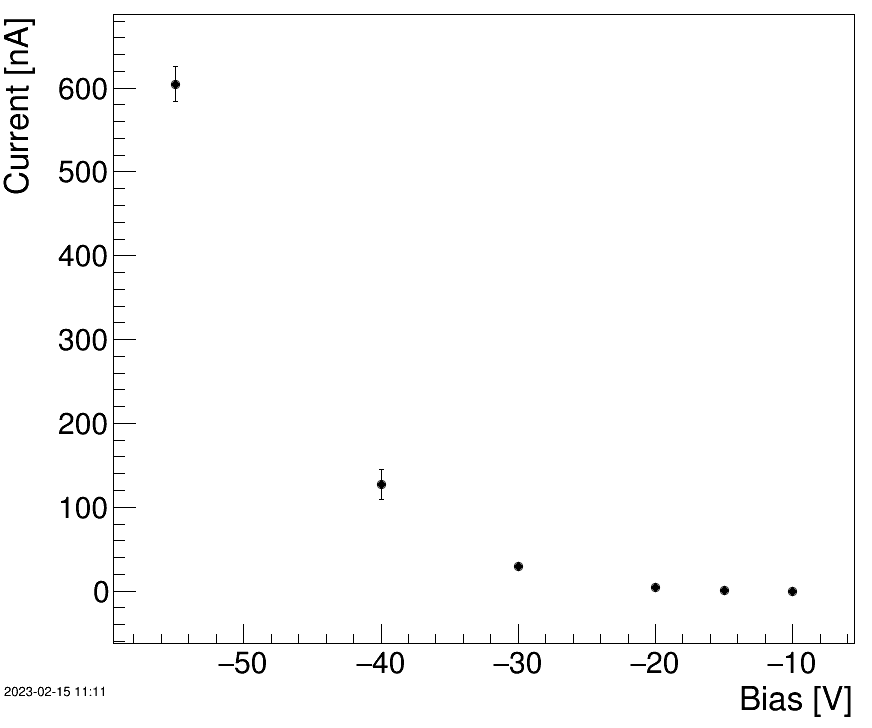

In [43]:
c_desy = desy.draw_current(fn=f'cur-{suf(desy)}')
dc()

INFO:     10:16:12 --> saving plot: cur-b6-vscan-cern

INFO:     10:16:12 --> wrote file /home/dmitry/mounts/high-rate/content/duts/II6-B6/v-b6/cur-b6-vscan-cern.html
INFO:     10:16:12 --> https://diamond.ethz.ch/high-rate/content/duts/II6-B6/v-b6/cur-b6-vscan-cern.html


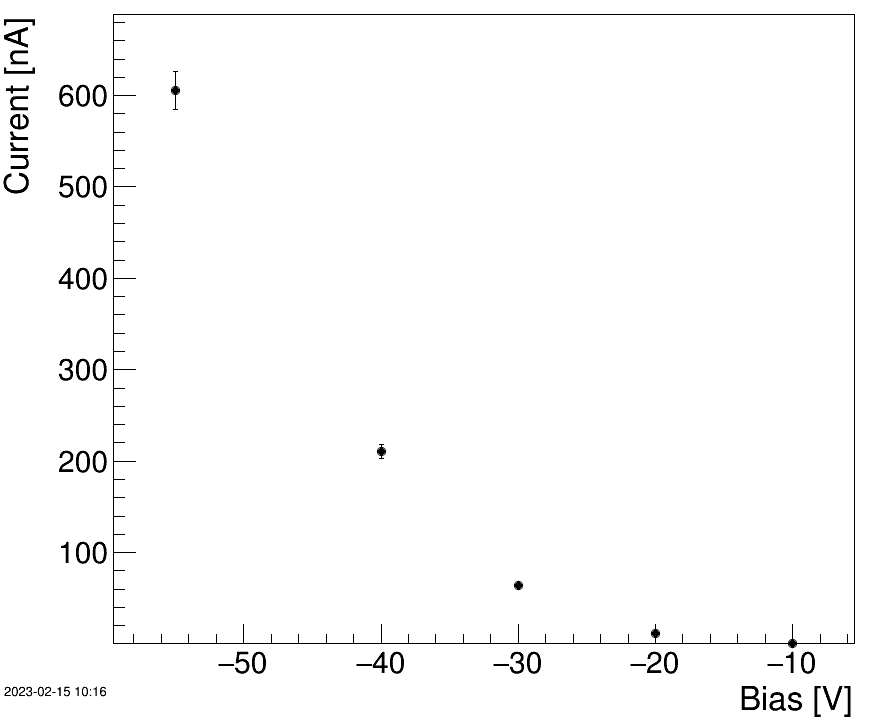

In [23]:
c_cern = z.draw_current(fn=f'cur-{suf(cern)}')
dc()

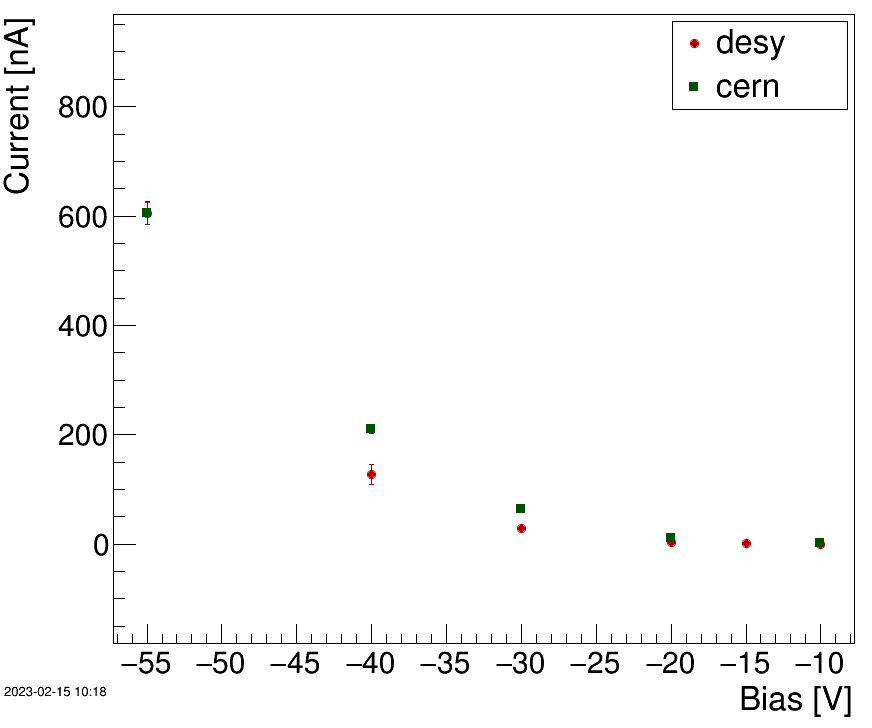

In [25]:
cern.Draw.multigraph([c_desy, c_cern], title='currents desy and cern', leg_titles=['desy', 'cern'])
dc()

## Efficiency versus the Bias voltage

INFO:     10:09:14 --> saving plot: e-b6-vscan-cern

INFO:     10:09:14 --> wrote file /home/dmitry/mounts/high-rate/content/duts/II6-B6/v-b6/e-b6-vscan-cern.html
INFO:     10:09:14 --> https://diamond.ethz.ch/high-rate/content/duts/II6-B6/v-b6/e-b6-vscan-cern.html


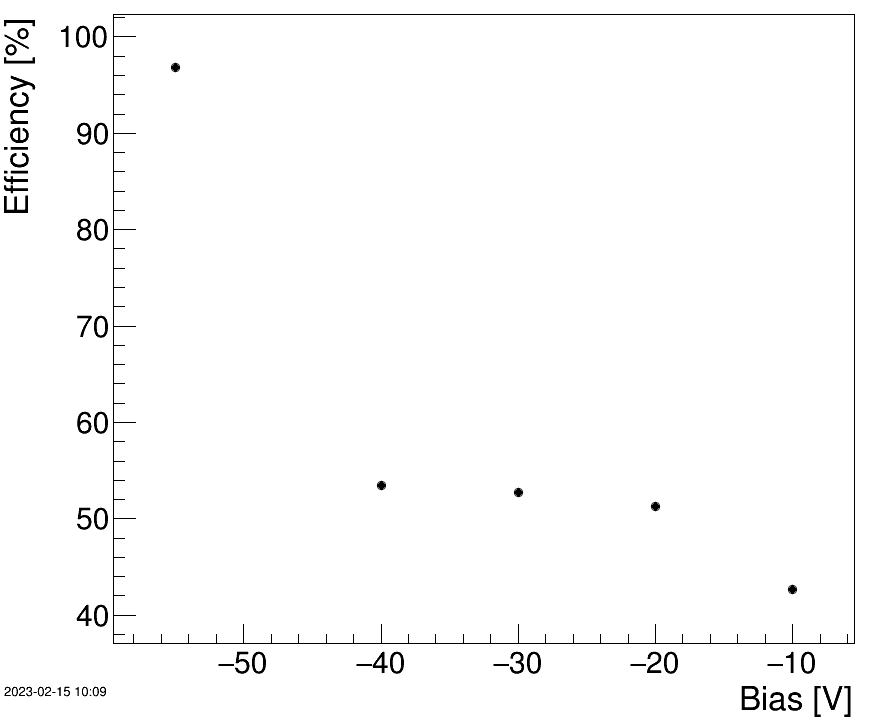

In [18]:
cern.draw_efficiency(fn=f'e-{suf(cern)}')
dc()

## Average pulse height versus the bias voltage

INFO:     10:10:30 --> saving plot: ph-b6-vscan-cern

INFO:     10:10:30 --> wrote file /home/dmitry/mounts/high-rate/content/duts/II6-B6/v-b6/ph-b6-vscan-cern.html
INFO:     10:10:30 --> https://diamond.ethz.ch/high-rate/content/duts/II6-B6/v-b6/ph-b6-vscan-cern.html


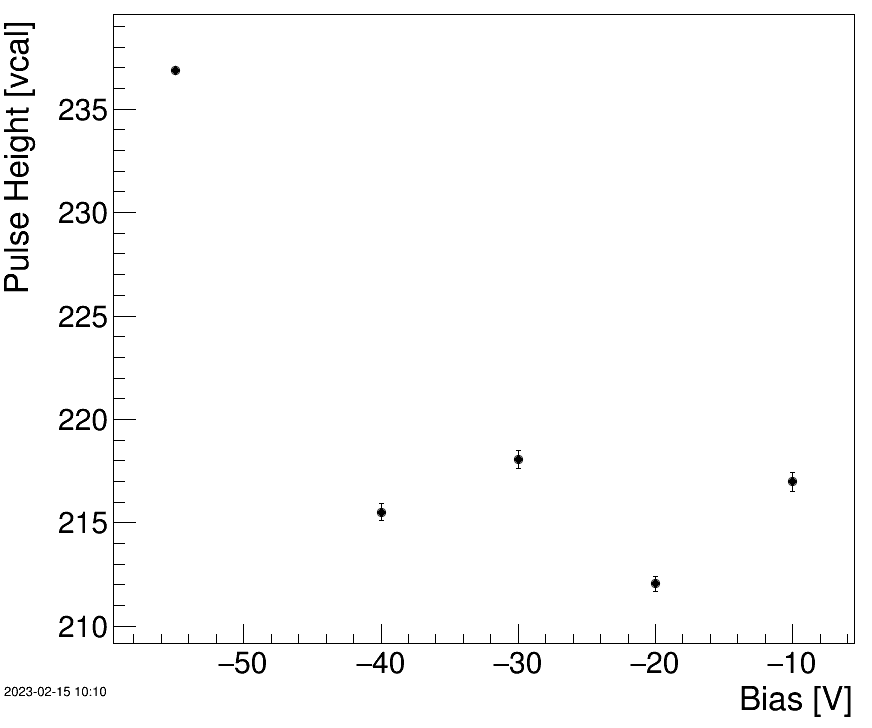

In [19]:
cern.draw_pulse_height(fn=f'ph-{suf(cern)}')
dc()

## Pulse Height Distributions versus Voltage

INFO:     10:21:36 --> saving plot: PhDists

INFO:     10:21:36 --> wrote file /home/dmitry/mounts/high-rate/content/duts/II6-B6/v-b6/PhDists.html
INFO:     10:21:36 --> https://diamond.ethz.ch/high-rate/content/duts/II6-B6/v-b6/PhDists.html


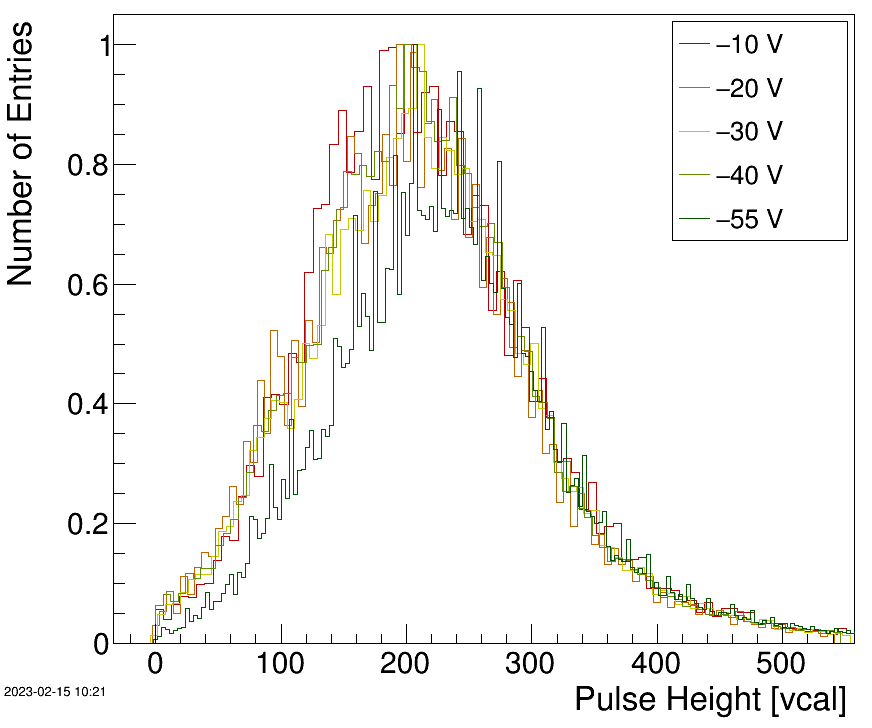

In [26]:
phd_cern = cern.draw_ph_dists(fn=f'ph-dist-{suf(cern)}')
dc()

In [34]:
h_v = zip(phd_cern, voltages)
cern.draw_sig

Signature: z.draw_ph_dists(**dkw)
Docstring: <no docstring>
File:      ~/software/HighResAnalysis/src/scan.py
Type:      method


In [38]:
cern.draw_efficiency(cuts=z.cuts(cern.Cut.readout_cols, r0=7))

Progress: 100% |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| Time: 0:00:01  19.75  B/s
Progress: 100% |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| Time: 0:00:01  13.15  B/s
Progress: 100% |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| Time: 0:00:01  17.22  B/s
Progress: 100% |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| Time: 0:00:01  17.38  B/s
Progress: 100% |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

TypeError: eff() got an unexpected keyword argument 'cut'

Progress: 100% |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| Time: 0:00:00  20.83  B/s
Progress: 100% |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| Time: 0:00:01  13.16  B/s
Progress: 100% |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| Time: 0:00:01  17.22  B/s
Progress: 100% |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| Time: 0:00:01  17.99  B/s
Progress: 100% |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

INFO:     10:34:59 --> saving plot: PH

INFO:     10:34:59 --> wrote file /home/dmitry/mounts/high-rate/content/duts/II6-B6/v-b6/PH.html
INFO:     10:34:59 --> https://diamond.ethz.ch/high-rate/content/duts/II6-B6/v-b6/PH.html


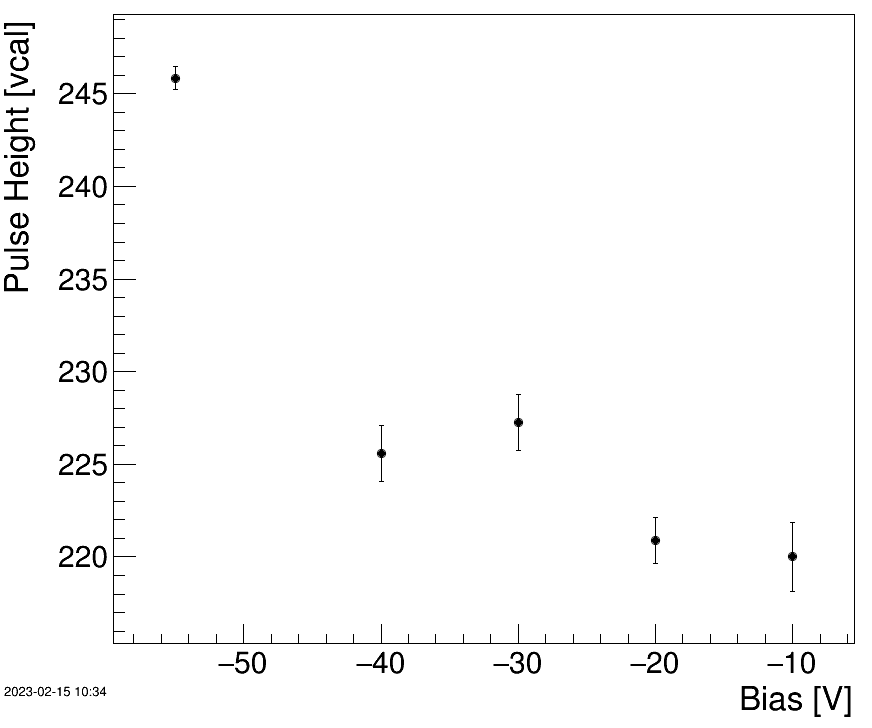

In [41]:
cern.draw_pulse_height(cuts=cern.cuts(cern.Cut.readout_cols, r0=7))
dc()

## Adding a list of cuts to a scan

First create a list of cuts by looping over the analyses and adding the cut with analysis.Cut.cut_function(params)

In [11]:
cern.Anas # list of analyses

[BATCH ANALYSIS of II6-B6, batch 1f (Oct 2018), 5.26M ev,
 BATCH ANALYSIS of II6-B6, batch 1b (Oct 2018), 8.22M ev,
 BATCH ANALYSIS of II6-B6, batch 1c (Oct 2018), 6.04M ev,
 BATCH ANALYSIS of II6-B6, batch 1d (Oct 2018), 5.66M ev,
 BATCH ANALYSIS of II6-B6, batch 1e (Oct 2018), 20.28M ev]

In [12]:
bias_col_cut = [ana.Cut.add(ana.Cut.bias_cols(7)) for ana in cern.Anas]

Progress: 100% |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| Time: 0:00:01  15.85  B/s
Progress: 100% |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| Time: 0:00:01  12.71  B/s
Progress: 100% |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| Time: 0:00:01  16.88  B/s
Progress: 100% |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| Time: 0:00:01  17.03  B/s
Progress: 100% |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Then create a list histograms by scanning over the cuts and analyses in z.Anas

In [13]:
dkw={}
hl= [ana.draw_signal_distribution(save=False, cut=cut, **rm_key(dkw, 'save')) for ana, cut in zip(z.Anas, bias_col_cut)]

Finally, pass the list of histograms to `cern.Draw.stack`, where `cern` is an instance of the `VScan` class

INFO:     10:01:58 --> saving plot: PhDists
  Failed to open file /home/dmitry/mounts/high-rate/content/duts/II6-B6/v-b6/plots.root


SysError in <TFile::TFile>: file /home/dmitry/mounts/high-rate/content/duts/II6-B6/v-b6/plots.root can not be opened Permission denied


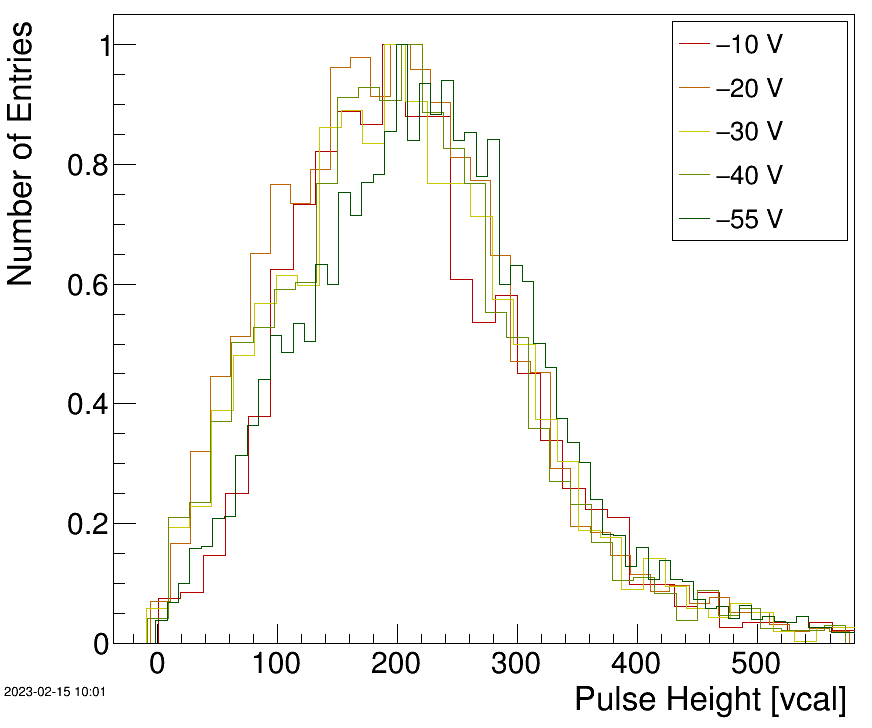

In [14]:
cern.Draw.stack(hl, 'PHDists', cern.x2str(), **prep_kw(dkw, scale=True, file_name='PhDists'))
dc()

Progress: 100% |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| Time: 0:00:00  21.20  B/s
Progress: 100% |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| Time: 0:00:00  21.31  B/s
Progress: 100% |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| Time: 0:00:01  13.26  B/s
Progress: 100% |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| Time: 0:00:01  13.28  B/s
Progress: 100% |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

INFO:     10:02:22 --> saving plot: RPHCols
  Failed to open file /home/dmitry/mounts/high-rate/content/duts/II6-B6/v-b6/plots.root


SysError in <TFile::TFile>: file /home/dmitry/mounts/high-rate/content/duts/II6-B6/v-b6/plots.root can not be opened Permission denied


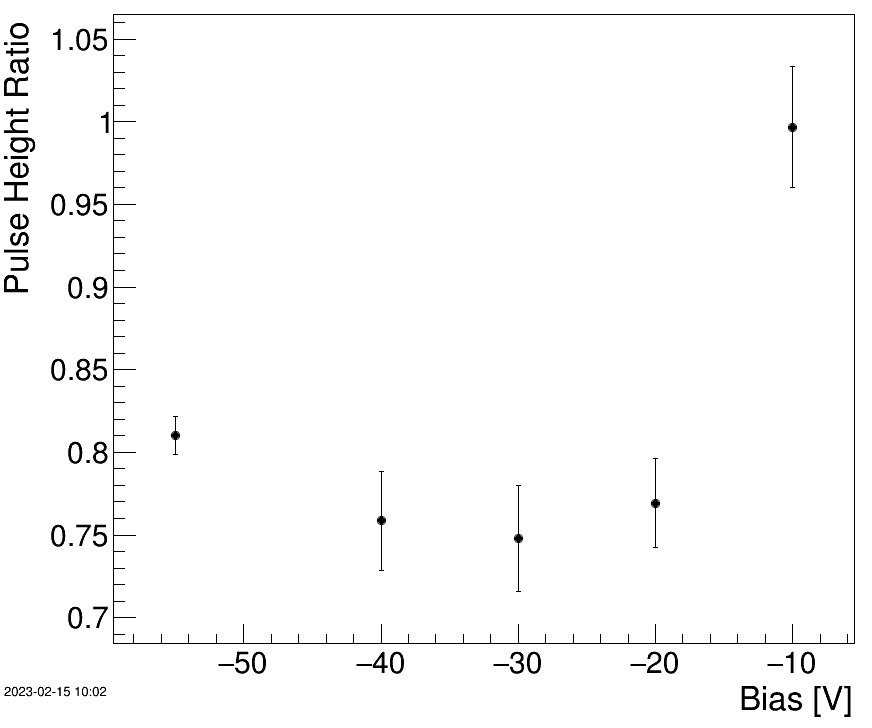

In [15]:
cern.draw_r_ph_cols(r=5)
dc()

In [16]:
x = cern.values(DUTAnalysis.current)
y = cern.values(DUTAnalysis.eff)
cern.Draw.graph(x,y, leg=cern.legend())
dc()

TypeError: legend() missing 1 required positional argument: 'h'

In [ ]:
cern.Draw.stack??